

# **Step 1: Reading & Exploring Data**



In [306]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import missingno as msno
import scipy.stats as stats
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, log_loss, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [307]:
df = pd.read_excel('/content/train.xlsx')

In [308]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,HP,Intel,Core i3,11th,4 GB,DDR4,512 GB,0 GB,64-bit Windows,0 GB,ThinNlight,1 year,No,Yes,48900,Good Rating,1278,135
1,HP,AMD,Ryzen 3,Not Available,4 GB,DDR4,512 GB,0 GB,64-bit Windows,0 GB,ThinNlight,1 year,No,Yes,44490,Good Rating,267,42
2,acer,Intel,Core i7,11th,16 GB,DDR4,512 GB,1024 GB,64-bit Windows,4 GB,Casual,1 year,No,No,92990,Good Rating,214,37
3,ASUS,Intel,Core i3,11th,8 GB,DDR4,256 GB,0 GB,64-bit Windows,0 GB,Casual,1 year,No,No,45990,Good Rating,816,147
4,ASUS,Intel,Core i3,11th,4 GB,DDR4,256 GB,0 GB,32-bit Windows,0 GB,Casual,1 year,No,Yes,35990,Good Rating,1479,181


In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              579 non-null    object
 1   processor_brand    579 non-null    object
 2   processor_name     579 non-null    object
 3   processor_gnrtn    579 non-null    object
 4   ram_gb             579 non-null    object
 5   ram_type           579 non-null    object
 6   ssd                579 non-null    object
 7   hdd                579 non-null    object
 8   os                 579 non-null    object
 9   graphic_card_gb    579 non-null    object
 10  weight             579 non-null    object
 11  warranty           579 non-null    object
 12  Touchscreen        579 non-null    object
 13  msoffice           579 non-null    object
 14  Price              579 non-null    int64 
 15  rating             579 non-null    object
 16  Number of Ratings  579 non-null    int64 
 1

In [310]:
df.describe()

,Price,Number of Ratings,Number of Reviews
count,579.000000,579.000000,579.000000
mean,77588.267703,278.267703,33.913644
std,47473.840198,744.151038,87.990029
min,16990.000000,0.000000,0.000000
25%,44990.000000,0.000000,0.000000
50%,64990.000000,17.000000,3.000000
75%,89990.000000,157.500000,20.000000
max,441990.000000,7291.000000,895.000000


In [311]:
# @title Distinct Values of Categorical Features
object_columns = df.select_dtypes(include='object').columns
for column in object_columns:
    print(f"Column: {column}")
    print(df[column].unique(),'\n')

distinct_values_dict = {}
for column in object_columns:
    distinct_values_dict[column] = df[column].unique()

Column: brand
['HP' 'acer' 'ASUS' 'Lenovo' 'MSI' 'DELL' 'Avita' 'APPLE'] 

Column: processor_brand
['Intel' 'AMD' 'M1'] 

Column: processor_name
['Core i3' 'Ryzen 3' 'Core i7' 'Core i5' 'Ryzen 5' 'Celeron Dual'
 'Ryzen 7' 'M1' 'Pentium Quad' 'Ryzen 9' 'Core i9'] 

Column: processor_gnrtn
['11th' 'Not Available' '10th' '8th' '4th' '7th' '9th' '12th'] 

Column: ram_gb
['4 GB' '16 GB' '8 GB' '32 GB'] 

Column: ram_type
['DDR4' 'LPDDR4' 'LPDDR4X' 'DDR5' 'DDR3' 'LPDDR3'] 

Column: ssd
['512 GB' '256 GB' '0 GB' '128 GB' '1024 GB' '2048 GB' '3072 GB'] 

Column: hdd
['0 GB' '1024 GB' '512 GB' '2048 GB'] 

Column: os
['64-bit Windows' '32-bit Windows' '32-bit DOS' '64-bit Mac' '64-bit DOS'] 

Column: graphic_card_gb
['0 GB' '4 GB' '2 GB' '6 GB' '8 GB'] 

Column: weight
['ThinNlight' 'Casual' 'Gaming'] 

Column: warranty
['1 year' 'No warranty' '2 years' '3 years'] 

Column: Touchscreen
['No' 'Yes'] 

Column: msoffice
['Yes' 'No'] 

Column: rating
['Good Rating' 'Bad Rating'] 



In [312]:
print("Number of Duplicates: ",df.duplicated().sum())
print("Data Shape: ",df.shape)

Number of Duplicates:  9
Data Shape:  (579, 18)


<ipython-input-313-87e11caeb2c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

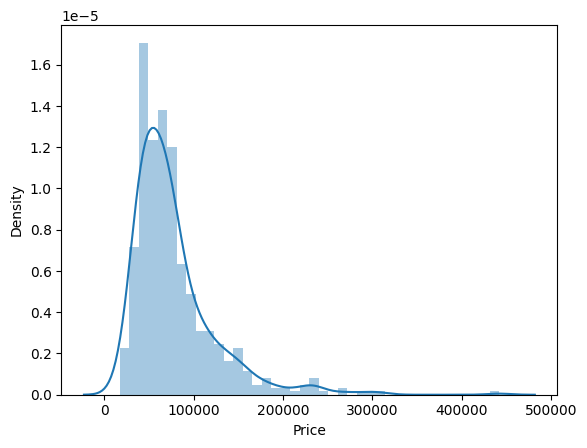

In [313]:
sns.distplot(df['Price'])

<ipython-input-314-cb0ddb3aad4a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Number of Reviews'])


<Axes: xlabel='Number of Reviews', ylabel='Density'>

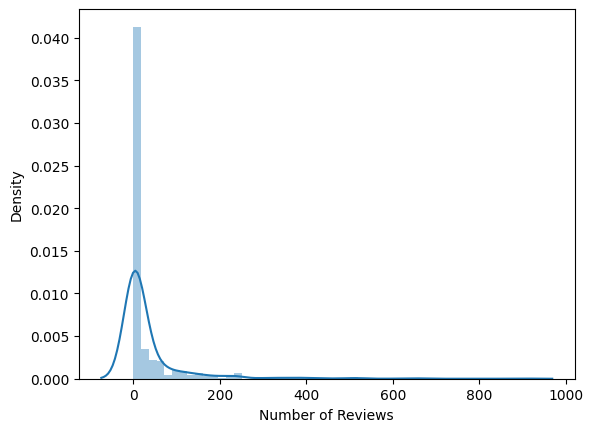

In [314]:
sns.distplot(df['Number of Reviews'])

<ipython-input-315-494ff0c2d856>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Number of Ratings'])


<Axes: xlabel='Number of Ratings', ylabel='Density'>

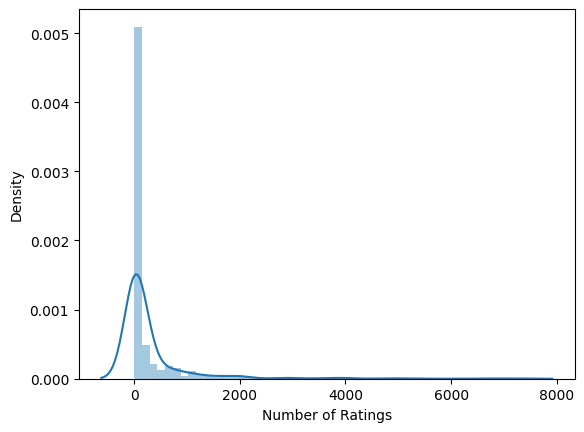

In [315]:
sns.distplot(df['Number of Ratings'])


# **Step 2: Preprocessing**

In [316]:
df[['os-bits', 'os']] = df['os'].str.split('-bit', n=1, expand=True)


df['os'] = df['os'].str.strip()

df['os-bits'] = pd.to_numeric(df['os-bits'])

In [317]:
#converting categorical values into numerical values.
#There are some columns that have categorical values ,but actually a numerical value

df['ram_gb'] = df['ram_gb'].astype(str).str.replace('GB','')
df['ram_gb'] = pd.to_numeric(df['ram_gb'])

df['ssd'] = df['ssd'].astype(str).str.replace('GB','')
df['ssd'] = pd.to_numeric(df['ssd'])

df['hdd'] = df['hdd'].astype(str).str.replace('GB','')
df['hdd'] = pd.to_numeric(df['hdd'])


df['graphic_card_gb'] = df['graphic_card_gb'].astype(str).str.replace('GB','')
df['graphic_card_gb'] = pd.to_numeric(df['graphic_card_gb'])

## **Duplicates Handling**

In [318]:
df.isnull().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
os-bits              0
dtype: int64

In [319]:
df = df.drop_duplicates()

In [320]:
print("Number of Duplicates: ",df.duplicated().sum())
print("Data Shape: ",df.shape)

Number of Duplicates:  0
Data Shape:  (570, 19)


In [321]:
categorical_df = df.select_dtypes(include=['object', 'category'])
categorical_df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_type,os,weight,warranty,Touchscreen,msoffice,rating
0,HP,Intel,Core i3,11th,DDR4,Windows,ThinNlight,1 year,No,Yes,Good Rating
1,HP,AMD,Ryzen 3,Not Available,DDR4,Windows,ThinNlight,1 year,No,Yes,Good Rating
2,acer,Intel,Core i7,11th,DDR4,Windows,Casual,1 year,No,No,Good Rating
3,ASUS,Intel,Core i3,11th,DDR4,Windows,Casual,1 year,No,No,Good Rating
4,ASUS,Intel,Core i3,11th,DDR4,Windows,Casual,1 year,No,Yes,Good Rating


In [322]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
numerical_df.head()

,ram_gb,ssd,hdd,graphic_card_gb,Price,Number of Ratings,Number of Reviews,os-bits
0,4,512,0,0,48900,1278,135,64
1,4,512,0,0,44490,267,42,64
2,16,512,1024,4,92990,214,37,64
3,8,256,0,0,45990,816,147,64
4,4,256,0,0,35990,1479,181,32


In [323]:
categorical_mode  = {}
categorical_mode  = {c: df[c].mode()[0] for c in categorical_df}
categorical_mode.pop('rating', None)

categorical_mode

{'brand': 'ASUS',
 'processor_brand': 'Intel',
 'processor_name': 'Core i5',
 'processor_gnrtn': '11th',
 'ram_type': 'DDR4',
 'os': 'Windows',
 'weight': 'Casual',
 'warranty': '1 year',
 'Touchscreen': 'No',
 'msoffice': 'No'}

In [324]:
numeric_mean = {}
numeric_mean = {c: df[c].mean() for c in numerical_df}

numeric_mean

{'ram_gb': 8.701754385964913,
 'ssd': 443.50877192982455,
 'hdd': 238.93333333333334,
 'graphic_card_gb': 1.249122807017544,
 'Price': 77684.4403508772,
 'Number of Ratings': 280.1070175438596,
 'Number of Reviews': 34.06842105263158,
 'os-bits': 59.28421052631579}

In [325]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews,os-bits
0,HP,Intel,Core i3,11th,4,DDR4,512,0,Windows,0,ThinNlight,1 year,No,Yes,48900,Good Rating,1278,135,64
1,HP,AMD,Ryzen 3,Not Available,4,DDR4,512,0,Windows,0,ThinNlight,1 year,No,Yes,44490,Good Rating,267,42,64
2,acer,Intel,Core i7,11th,16,DDR4,512,1024,Windows,4,Casual,1 year,No,No,92990,Good Rating,214,37,64
3,ASUS,Intel,Core i3,11th,8,DDR4,256,0,Windows,0,Casual,1 year,No,No,45990,Good Rating,816,147,64
4,ASUS,Intel,Core i3,11th,4,DDR4,256,0,Windows,0,Casual,1 year,No,Yes,35990,Good Rating,1479,181,32


## **Feature Encoding**



> **1. Ordinal encoder will be applied to the following ordinal features:**

> *   rating
>*   processor_gnrtn
>*   warranty
>*   processor_name









In [326]:
ordinal_encoder_rating = OrdinalEncoder(categories=[['Good Rating', 'Bad Rating']])
df['rating'] = ordinal_encoder_rating.fit_transform(df[['rating']])
decoded_rating = ordinal_encoder_rating.inverse_transform(df[['rating']])

ordinal_encoder_processor_gnrtn = OrdinalEncoder(categories=[['Not Available','4th', '7th','8th','9th', '10th','11th','12th']])
df['processor_gnrtn']=ordinal_encoder_processor_gnrtn.fit_transform(df[['processor_gnrtn']])
decoded_processor_gnrtn = ordinal_encoder_processor_gnrtn.inverse_transform(df[['processor_gnrtn']])

ordinal_encoder_warranty = OrdinalEncoder(categories=[['No warranty', '1 year', '3 years', '2 years'] ])
df['warranty']=ordinal_encoder_warranty.fit_transform(df[['warranty']])
decoded_warranty = ordinal_encoder_warranty.inverse_transform(df[['warranty']])

ordinal_encoder_processor_name = OrdinalEncoder(categories=[['Celeron Dual', 'Pentium Quad', 'Ryzen 3', 'Core i3', 'Ryzen 5','Ryzen 7','Core i5','Core i7','Ryzen 9','Core i9','M1']])
df['processor_name']=ordinal_encoder_processor_name.fit_transform(df[['processor_name']])
decoded_processor_name = ordinal_encoder_processor_name.inverse_transform(df[['processor_name']])



> **2. Label Encoding will be applied to the following nominal features:**


> *   brand
*   processor_brand
*   ram_type
*   os
*   weight
*   msoffice
*   Touchscreen









In [327]:
label_encoder_brand = LabelEncoder()
df['brand'] = label_encoder_brand.fit_transform(df['brand'])
decoded_brand = label_encoder_brand.inverse_transform(df['brand'])


label_encoder_processor_brand = LabelEncoder()
df['processor_brand'] = label_encoder_processor_brand.fit_transform(df['processor_brand'])
decoded_processor_brand = label_encoder_processor_brand.inverse_transform(df['processor_brand'])


label_encoder_ram_type = LabelEncoder()
df['ram_type'] = label_encoder_ram_type.fit_transform(df['ram_type'])
decoded_ram_type = label_encoder_ram_type.inverse_transform(df['ram_type'])


label_encoder_os = LabelEncoder()
df['os'] = label_encoder_os.fit_transform(df['os'])
decoded_os = label_encoder_os.inverse_transform(df['os'])


label_encoder_weight = LabelEncoder()
df['weight'] = label_encoder_weight.fit_transform(df['weight'])
decoded_weight = label_encoder_weight.inverse_transform(df['weight'])


label_encoder_msoffice = LabelEncoder()
df['msoffice']=label_encoder_msoffice.fit_transform(df['msoffice'])
decoded_msoffice = label_encoder_msoffice.inverse_transform(df['msoffice'])


label_encoder_touchscreen = LabelEncoder()
df['Touchscreen']=label_encoder_touchscreen.fit_transform(df['Touchscreen'])
decoded_Touchscreen = label_encoder_touchscreen.inverse_transform(df['Touchscreen'])

In [328]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews,os-bits
0,4,1,3.0,6.0,4,1,512,0,2,0,2,1.0,0,1,48900,0.0,1278,135,64
1,4,0,2.0,0.0,4,1,512,0,2,0,2,1.0,0,1,44490,0.0,267,42,64
2,7,1,7.0,6.0,16,1,512,1024,2,4,0,1.0,0,0,92990,0.0,214,37,64
3,1,1,3.0,6.0,8,1,256,0,2,0,0,1.0,0,0,45990,0.0,816,147,64
4,1,1,3.0,6.0,4,1,256,0,2,0,0,1.0,0,1,35990,0.0,1479,181,32


## **Check If Data is Balnced**

In [329]:
type(decoded_rating)

numpy.ndarray

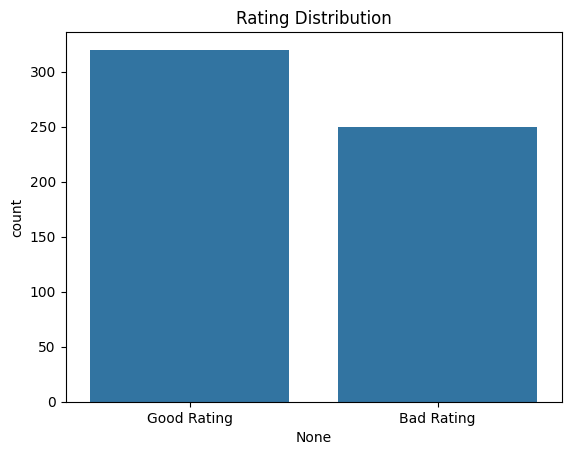

Good Rating    320
Bad Rating     250
Name: count, dtype: int64


In [330]:
sns.barplot(x=pd.Series(decoded_rating.flatten()).value_counts().index, y=df['rating'].value_counts())
plt.title('Rating Distribution')
plt.show()

class_frequency = pd.Series(decoded_rating.flatten()).value_counts()

print(class_frequency)



> Data shows class imbalance in target column



In [331]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews,os-bits
0,4,1,3.0,6.0,4,1,512,0,2,0,2,1.0,0,1,48900,0.0,1278,135,64
1,4,0,2.0,0.0,4,1,512,0,2,0,2,1.0,0,1,44490,0.0,267,42,64
2,7,1,7.0,6.0,16,1,512,1024,2,4,0,1.0,0,0,92990,0.0,214,37,64
3,1,1,3.0,6.0,8,1,256,0,2,0,0,1.0,0,0,45990,0.0,816,147,64
4,1,1,3.0,6.0,4,1,256,0,2,0,0,1.0,0,1,35990,0.0,1479,181,32


In [332]:
df.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'graphic_card_gb', 'weight',
       'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews', 'os-bits'],
      dtype='object')

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 578
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              570 non-null    int64  
 1   processor_brand    570 non-null    int64  
 2   processor_name     570 non-null    float64
 3   processor_gnrtn    570 non-null    float64
 4   ram_gb             570 non-null    int64  
 5   ram_type           570 non-null    int64  
 6   ssd                570 non-null    int64  
 7   hdd                570 non-null    int64  
 8   os                 570 non-null    int64  
 9   graphic_card_gb    570 non-null    int64  
 10  weight             570 non-null    int64  
 11  warranty           570 non-null    float64
 12  Touchscreen        570 non-null    int64  
 13  msoffice           570 non-null    int64  
 14  Price              570 non-null    int64  
 15  rating             570 non-null    float64
 16  Number of Ratings  570 non-null

In [334]:
encoded_categorical_df = df[['brand','processor_brand'	,'processor_name',	'processor_gnrtn',	'ram_type',	'os',	'weight',	'warranty',	'Touchscreen',	'msoffice',	'rating']]

In [335]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews,os-bits
0,4,1,3.0,6.0,4,1,512,0,2,0,2,1.0,0,1,48900,0.0,1278,135,64
1,4,0,2.0,0.0,4,1,512,0,2,0,2,1.0,0,1,44490,0.0,267,42,64
2,7,1,7.0,6.0,16,1,512,1024,2,4,0,1.0,0,0,92990,0.0,214,37,64
3,1,1,3.0,6.0,8,1,256,0,2,0,0,1.0,0,0,45990,0.0,816,147,64
4,1,1,3.0,6.0,4,1,256,0,2,0,0,1.0,0,1,35990,0.0,1479,181,32


In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 578
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              570 non-null    int64  
 1   processor_brand    570 non-null    int64  
 2   processor_name     570 non-null    float64
 3   processor_gnrtn    570 non-null    float64
 4   ram_gb             570 non-null    int64  
 5   ram_type           570 non-null    int64  
 6   ssd                570 non-null    int64  
 7   hdd                570 non-null    int64  
 8   os                 570 non-null    int64  
 9   graphic_card_gb    570 non-null    int64  
 10  weight             570 non-null    int64  
 11  warranty           570 non-null    float64
 12  Touchscreen        570 non-null    int64  
 13  msoffice           570 non-null    int64  
 14  Price              570 non-null    int64  
 15  rating             570 non-null    float64
 16  Number of Ratings  570 non-null

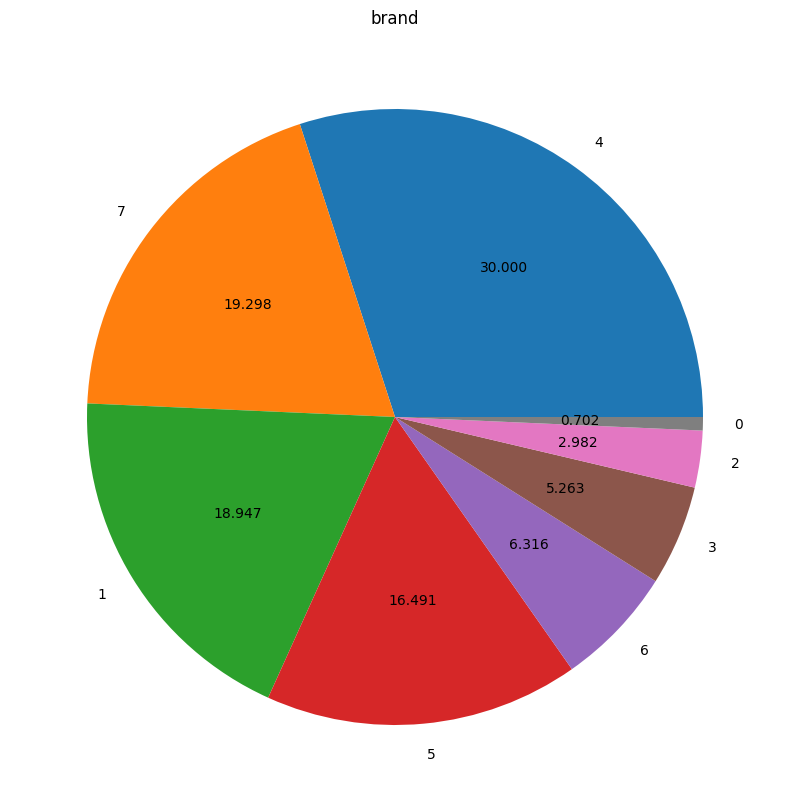

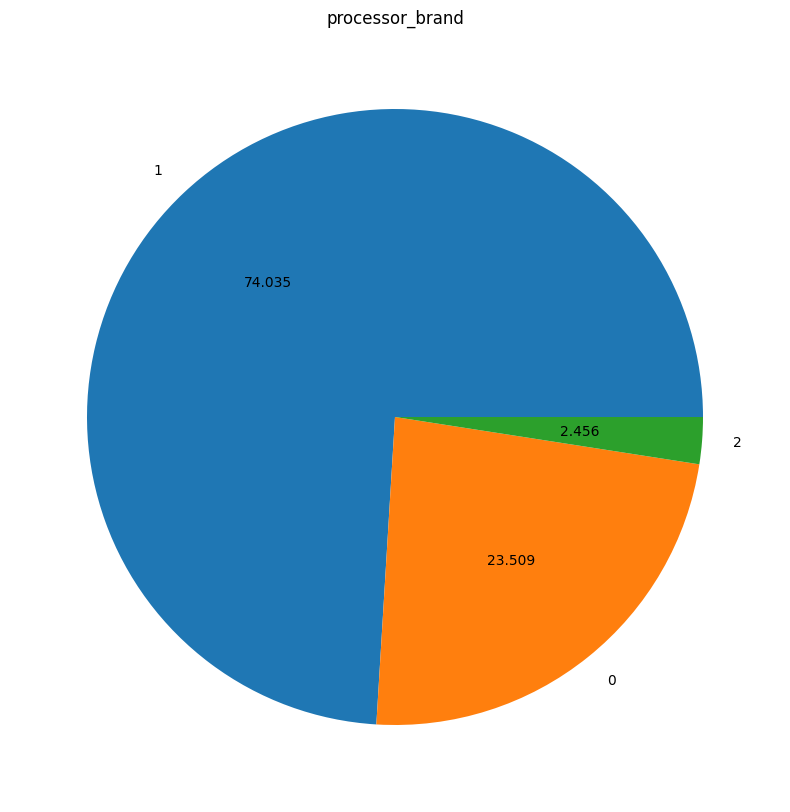

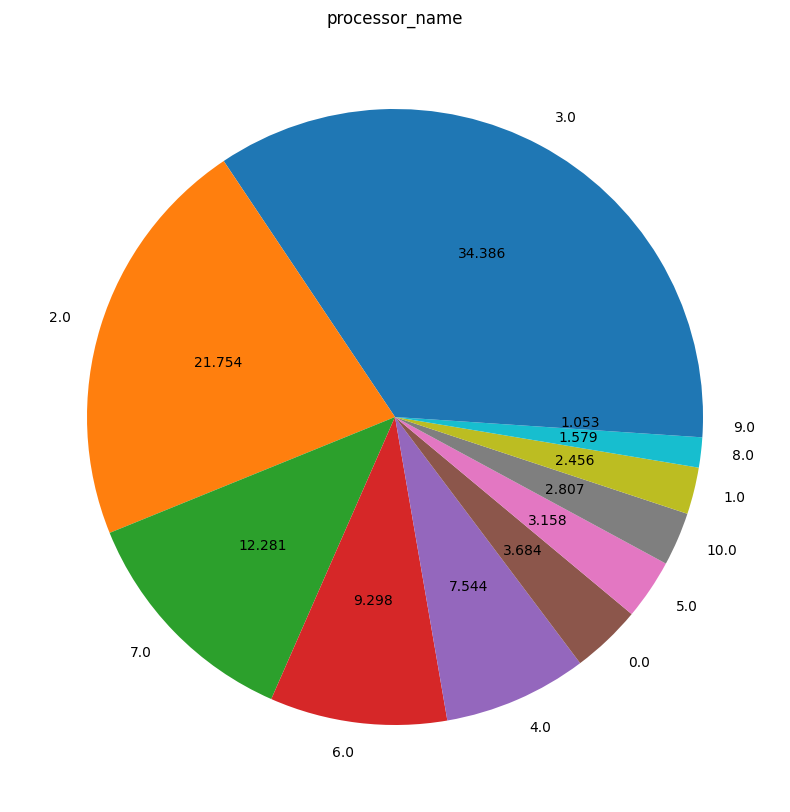

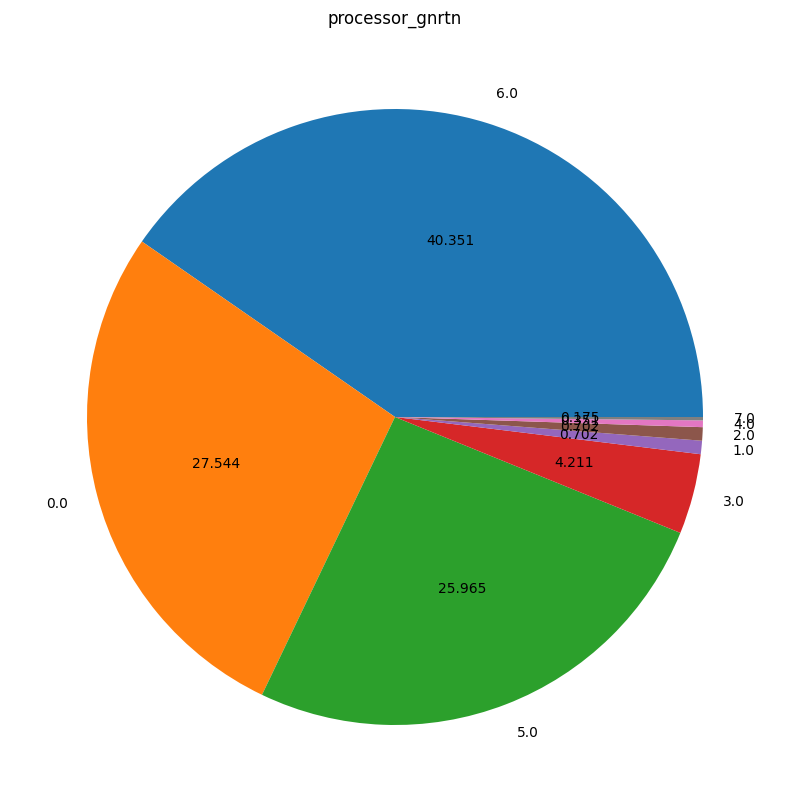

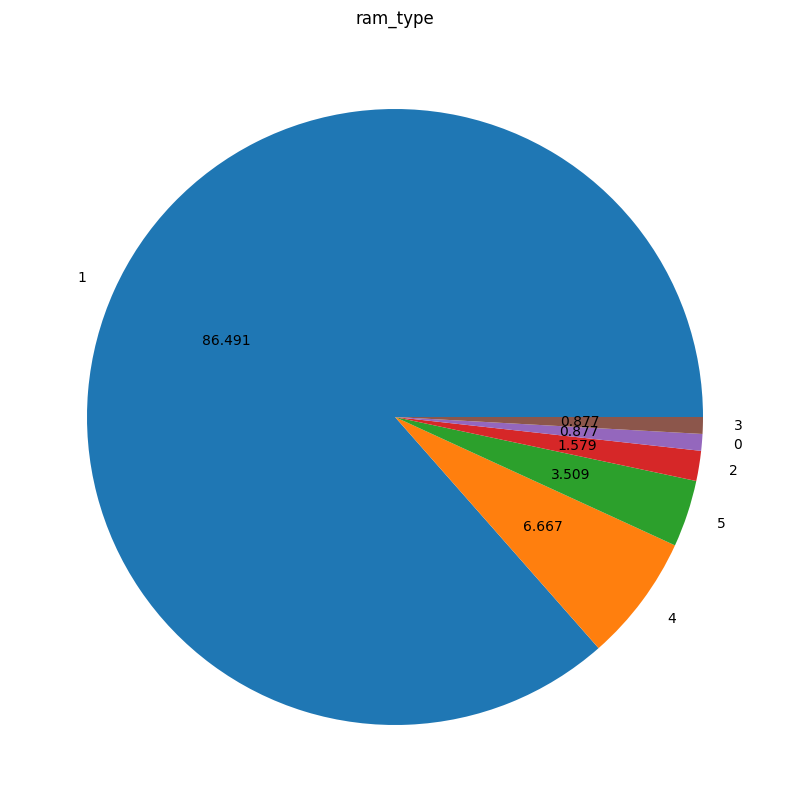

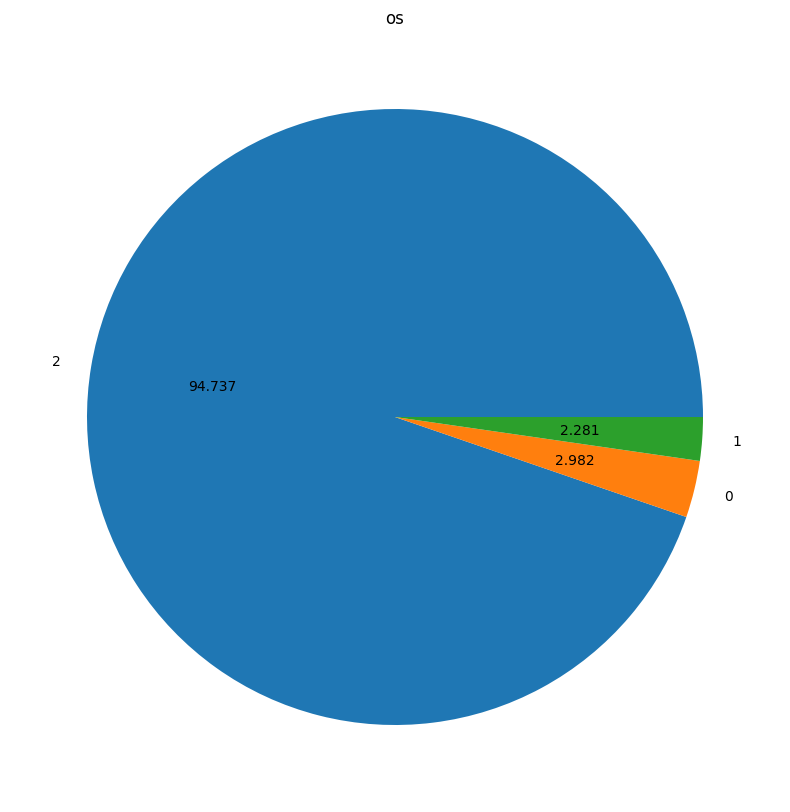

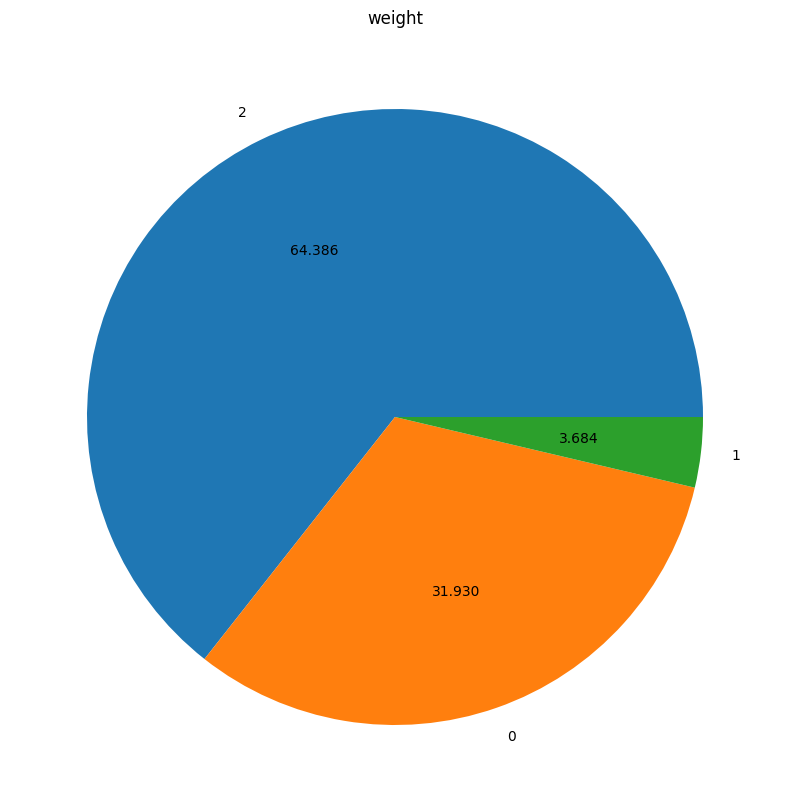

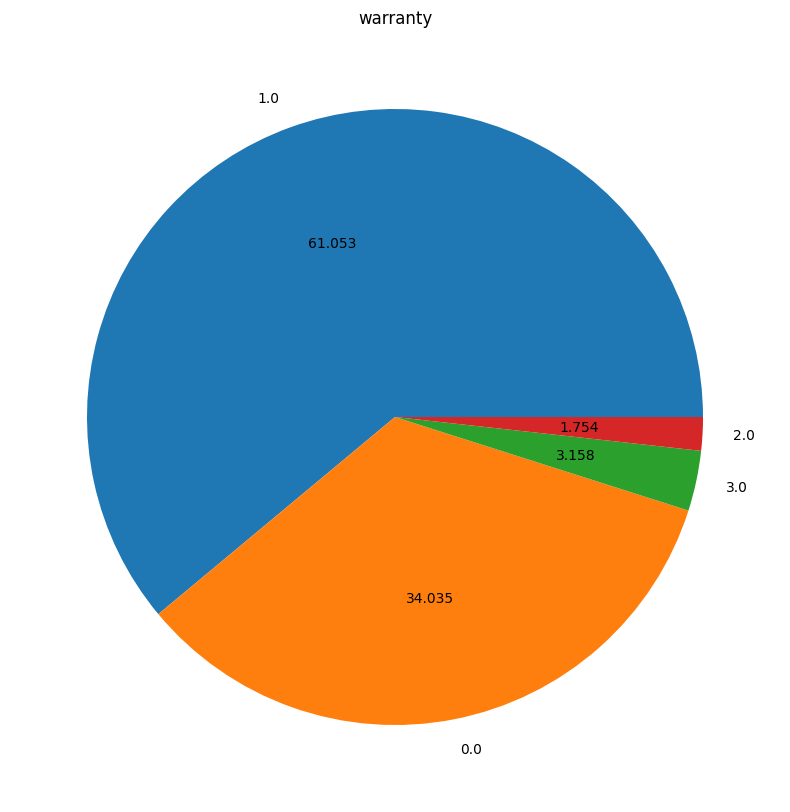

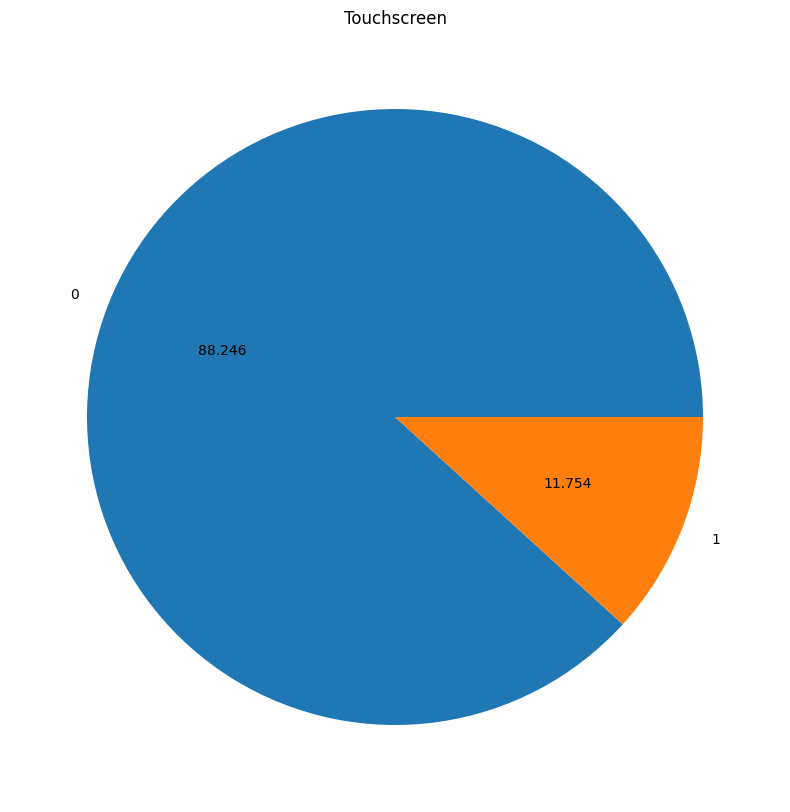

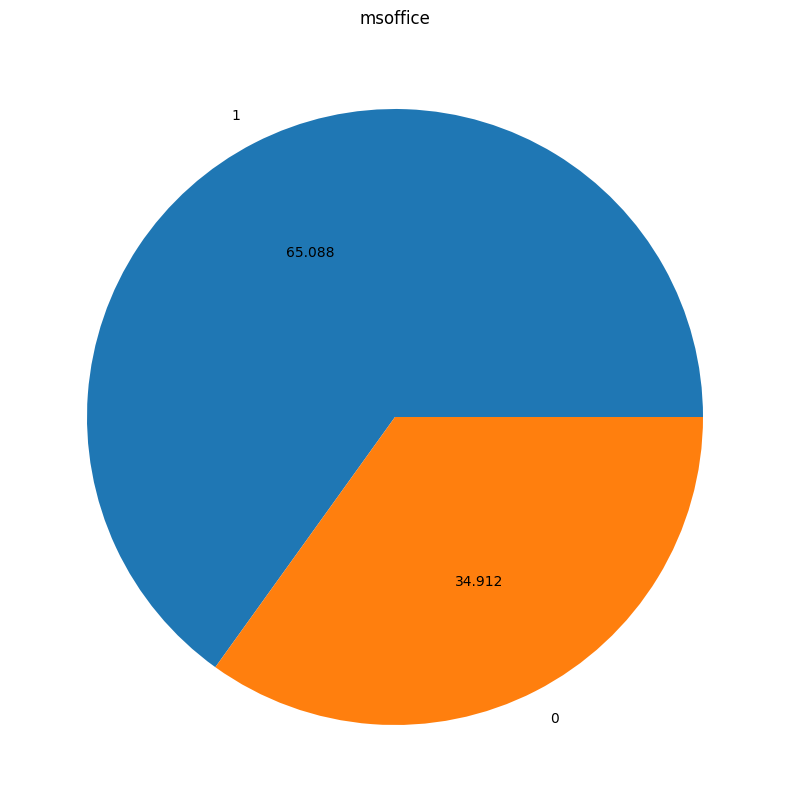

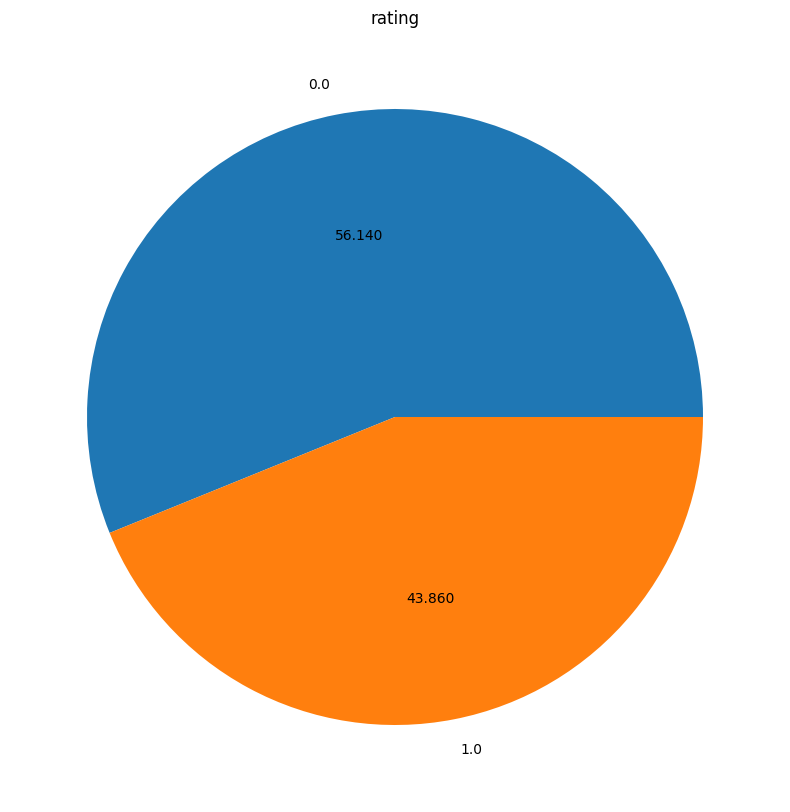

In [337]:
for col in encoded_categorical_df.columns:
    plt.figure(figsize=(40, 10))
    plt.title(col)
    plt.pie(df[col].value_counts(),
           labels=df[col].unique(),
            shadow=False,
            autopct='%.3f')
    plt.show()

In [338]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews,os-bits
0,4,1,3.0,6.0,4,1,512,0,2,0,2,1.0,0,1,48900,0.0,1278,135,64
1,4,0,2.0,0.0,4,1,512,0,2,0,2,1.0,0,1,44490,0.0,267,42,64
2,7,1,7.0,6.0,16,1,512,1024,2,4,0,1.0,0,0,92990,0.0,214,37,64
3,1,1,3.0,6.0,8,1,256,0,2,0,0,1.0,0,0,45990,0.0,816,147,64
4,1,1,3.0,6.0,4,1,256,0,2,0,0,1.0,0,1,35990,0.0,1479,181,32


In [339]:
df.shape

(570, 19)

In [340]:
df.drop('weight',inplace=True,axis=1)

In [341]:
encoded_categorical_df.drop('weight',inplace=True,axis=1)

<ipython-input-341-ef99be60566c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_categorical_df.drop('weight',inplace=True,axis=1)


In [342]:
df.shape

(570, 18)

## **Feature Scaling**

In [343]:
#Normalization
features_to_normalize=['Price']
price_scaler = MinMaxScaler(feature_range=(0, 1))

df[features_to_normalize] = price_scaler.fit_transform(df[features_to_normalize])

df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews,os-bits
0,4,1,3.0,6.0,4,1,512,0,2,0,1.0,0,1,0.075082,0.0,1278,135,64
1,4,0,2.0,0.0,4,1,512,0,2,0,1.0,0,1,0.064706,0.0,267,42,64
2,7,1,7.0,6.0,16,1,512,1024,2,4,1.0,0,0,0.178824,0.0,214,37,64
3,1,1,3.0,6.0,8,1,256,0,2,0,1.0,0,0,0.068235,0.0,816,147,64
4,1,1,3.0,6.0,4,1,256,0,2,0,1.0,0,1,0.044706,0.0,1479,181,32


In [344]:
features_to_normalize=['Number of Ratings']
num_rating_scaler = MinMaxScaler(feature_range=(0, 1))

df[features_to_normalize] = num_rating_scaler.fit_transform(df[features_to_normalize])

df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews,os-bits
0,4,1,3.0,6.0,4,1,512,0,2,0,1.0,0,1,0.075082,0.0,0.175285,135,64
1,4,0,2.0,0.0,4,1,512,0,2,0,1.0,0,1,0.064706,0.0,0.036620,42,64
2,7,1,7.0,6.0,16,1,512,1024,2,4,1.0,0,0,0.178824,0.0,0.029351,37,64
3,1,1,3.0,6.0,8,1,256,0,2,0,1.0,0,0,0.068235,0.0,0.111919,147,64
4,1,1,3.0,6.0,4,1,256,0,2,0,1.0,0,1,0.044706,0.0,0.202853,181,32


In [345]:
features_to_normalize=['Number of Reviews']
num_reviews_scaler = MinMaxScaler(feature_range=(0, 1))

df[features_to_normalize] = num_reviews_scaler.fit_transform(df[features_to_normalize])

df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews,os-bits
0,4,1,3.0,6.0,4,1,512,0,2,0,1.0,0,1,0.075082,0.0,0.175285,0.150838,64
1,4,0,2.0,0.0,4,1,512,0,2,0,1.0,0,1,0.064706,0.0,0.036620,0.046927,64
2,7,1,7.0,6.0,16,1,512,1024,2,4,1.0,0,0,0.178824,0.0,0.029351,0.041341,64
3,1,1,3.0,6.0,8,1,256,0,2,0,1.0,0,0,0.068235,0.0,0.111919,0.164246,64
4,1,1,3.0,6.0,4,1,256,0,2,0,1.0,0,1,0.044706,0.0,0.202853,0.202235,32


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 578
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              570 non-null    int64  
 1   processor_brand    570 non-null    int64  
 2   processor_name     570 non-null    float64
 3   processor_gnrtn    570 non-null    float64
 4   ram_gb             570 non-null    int64  
 5   ram_type           570 non-null    int64  
 6   ssd                570 non-null    int64  
 7   hdd                570 non-null    int64  
 8   os                 570 non-null    int64  
 9   graphic_card_gb    570 non-null    int64  
 10  warranty           570 non-null    float64
 11  Touchscreen        570 non-null    int64  
 12  msoffice           570 non-null    int64  
 13  Price              570 non-null    float64
 14  rating             570 non-null    float64
 15  Number of Ratings  570 non-null    float64
 16  Number of Reviews  570 non-null

In [347]:
categorical_df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_type,os,weight,warranty,Touchscreen,msoffice,rating
0,HP,Intel,Core i3,11th,DDR4,Windows,ThinNlight,1 year,No,Yes,Good Rating
1,HP,AMD,Ryzen 3,Not Available,DDR4,Windows,ThinNlight,1 year,No,Yes,Good Rating
2,acer,Intel,Core i7,11th,DDR4,Windows,Casual,1 year,No,No,Good Rating
3,ASUS,Intel,Core i3,11th,DDR4,Windows,Casual,1 year,No,No,Good Rating
4,ASUS,Intel,Core i3,11th,DDR4,Windows,Casual,1 year,No,Yes,Good Rating


## **Outlier Handling**

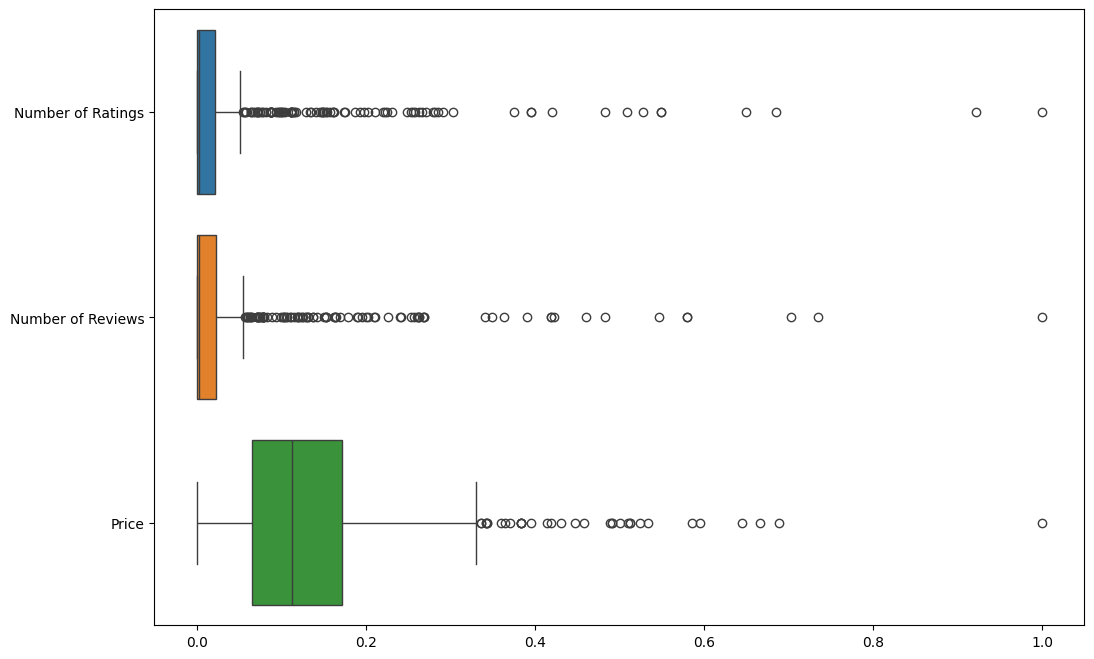

In [348]:
numerical_data = df[['Number of Ratings', 'Number of Reviews', 'Price']]
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_data, orient="h")
plt.show()

In [349]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

iqr_threshold = 3

iqr_ranges = {'Q1': Q1, 'Q3': Q3, 'IQR': IQR, 'Thresh' : iqr_threshold}

outlier_rows = df[((df < (Q1 - iqr_threshold * IQR)) | (df > (Q3 + iqr_threshold * IQR))).any(axis=1)]


for column in numerical_data:
    median_value = df[column].median()
    df.loc[df[column] < (Q1[column] - iqr_threshold * IQR[column]), column] = median_value
    df.loc[df[column] > (Q3[column] + iqr_threshold * IQR[column]), column] = median_value


# **Step 3: Feature Selection**

## **Correlation**

In [350]:
corr_matrix = df.corr()
corr_matrix['rating'].sort_values(ascending=False)

rating               1.000000
os                   0.113042
hdd                  0.083077
ram_type             0.080993
Price                0.063368
Touchscreen          0.039674
processor_brand     -0.002807
graphic_card_gb     -0.017516
processor_gnrtn     -0.023088
brand               -0.028933
ssd                 -0.031066
processor_name      -0.042958
ram_gb              -0.044458
os-bits             -0.121264
msoffice            -0.209752
warranty            -0.214060
Number of Ratings   -0.307462
Number of Reviews   -0.335708
Name: rating, dtype: float64

## **Chi Squared**

[5.50654376e-01 1.22500000e-03 8.71987123e-01 4.96123375e-01
 3.46425156e+00 4.36600957e-01 1.47037441e+01 7.91716418e-01
 1.63225126e+01]
[4.58050440e-01 9.72079741e-01 3.50405776e-01 4.81208448e-01
 6.27088805e-02 5.08767608e-01 1.25796359e-04 3.73581623e-01
 5.34254681e-05]


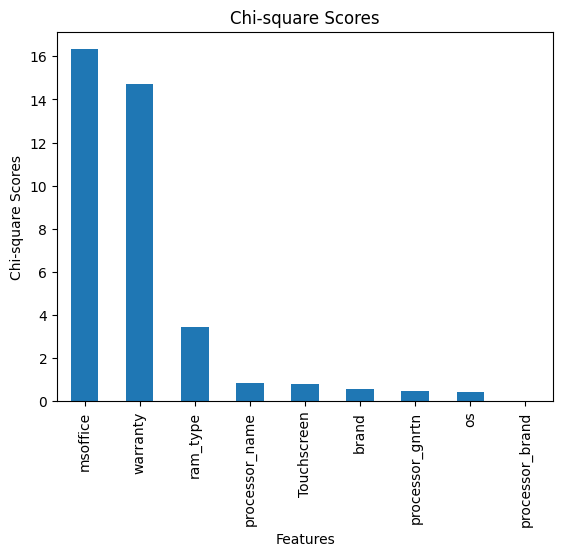

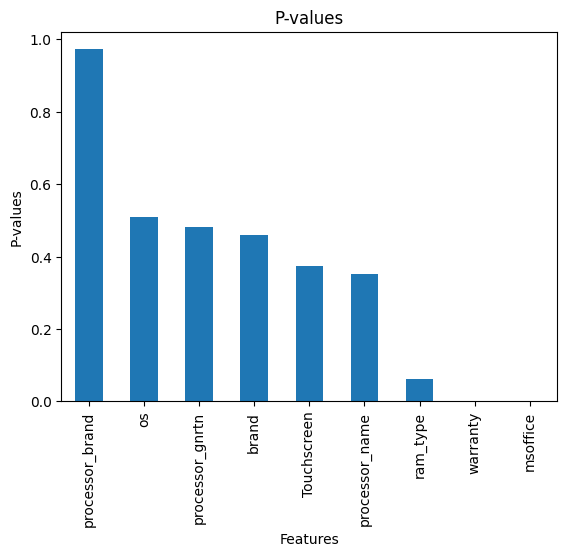

In [351]:
cat_data = encoded_categorical_df.drop('rating', axis=1)
target = encoded_categorical_df['rating']


chi2_scores, p_values = chi2(cat_data, target)


print(chi2_scores)
print(p_values)

chi_values = pd.Series(chi2_scores, index=cat_data.columns)
chi_values.sort_values(ascending=False, inplace=True)

chi_values.plot.bar()
plt.title('Chi-square Scores')
plt.xlabel('Features')
plt.ylabel('Chi-square Scores')
plt.show()


p_values_series = pd.Series(p_values, index=cat_data.columns)
p_values_series.sort_values(ascending=False, inplace=True)

# Plot p-values as a bar plot
p_values_series.plot.bar()
plt.title('P-values')
plt.xlabel('Features')
plt.ylabel('P-values')
plt.show()

In [352]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews,os-bits
0,4,1,3.0,6.0,4,1,512,0,2,0,1.0,0,1,0.075082,0.0,0.002332,0.003352,64
1,4,0,2.0,0.0,4,1,512,0,2,0,1.0,0,1,0.064706,0.0,0.036620,0.046927,64
2,7,1,7.0,6.0,16,1,512,1024,2,4,1.0,0,0,0.178824,0.0,0.029351,0.041341,64
3,1,1,3.0,6.0,8,1,256,0,2,0,1.0,0,0,0.068235,0.0,0.002332,0.003352,64
4,1,1,3.0,6.0,4,1,256,0,2,0,1.0,0,1,0.044706,0.0,0.002332,0.003352,32


In [353]:
df.drop('processor_name',axis=1,inplace=True)
df.drop('processor_gnrtn',axis=1,inplace=True)
df.drop('processor_brand',axis=1,inplace=True)
df.drop('os',axis=1,inplace=True)
df.drop('brand',axis=1,inplace=True)
df.drop('Touchscreen',axis=1,inplace=True)

In [354]:
df.shape

(570, 12)

## **ANOVA**

In [355]:
numerical_df.head()

,ram_gb,ssd,hdd,graphic_card_gb,Price,Number of Ratings,Number of Reviews,os-bits
0,4,512,0,0,48900,1278,135,64
1,4,512,0,0,44490,267,42,64
2,16,512,1024,4,92990,214,37,64
3,8,256,0,0,45990,816,147,64
4,4,256,0,0,35990,1479,181,32


In [356]:
encoded_numerical_df = df[['ram_gb','ssd','hdd','graphic_card_gb','Number of Ratings','Number of Reviews','Price','os-bits']]

In [357]:
from scipy.stats import f_oneway

target_column = 'rating'


feature_columns = [col for col in numerical_df.columns if col != target_column]

alpha = 0.05
significant_features = []

for feature_column in feature_columns:
    groups = [df[df[feature_column] == value][target_column] for value in df[feature_column].unique()]
    statistic, p_value = f_oneway(*groups)

    print(f"Feature: {feature_column}")
    print("ANOVA statistic:", statistic)
    print("p-value:", p_value)

    if p_value < alpha:
        print("Reject null hypothesis: There are significant differences between at least two groups.")
        significant_features.append(feature_column)
    else:
        print("Fail to reject null hypothesis: There is no significant difference between the groups.")

    print()

print("Significant features:", significant_features)

Feature: ram_gb
ANOVA statistic: 7.537953512062652
p-value: 5.946041100241679e-05
Reject null hypothesis: There are significant differences between at least two groups.

Feature: ssd
ANOVA statistic: 3.4438060186841106
p-value: 0.002384499372885374
Reject null hypothesis: There are significant differences between at least two groups.

Feature: hdd
ANOVA statistic: 2.028765753576373
p-value: 0.1087678514635384
Fail to reject null hypothesis: There is no significant difference between the groups.

Feature: graphic_card_gb
ANOVA statistic: 0.7103142853061594
p-value: 0.5850943836319158
Fail to reject null hypothesis: There is no significant difference between the groups.

Feature: Price
ANOVA statistic: 1.320436718098309
p-value: 0.010153103373245669
Reject null hypothesis: There are significant differences between at least two groups.

Feature: Number of Ratings
ANOVA statistic: 7.318692938610069
p-value: 3.8812493630639126e-59
Reject null hypothesis: There are significant differences be

In [358]:
df.drop('hdd',axis=1,inplace=True)
df.drop('graphic_card_gb',axis=1,inplace=True)

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 578
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ram_gb             570 non-null    int64  
 1   ram_type           570 non-null    int64  
 2   ssd                570 non-null    int64  
 3   warranty           570 non-null    float64
 4   msoffice           570 non-null    int64  
 5   Price              570 non-null    float64
 6   rating             570 non-null    float64
 7   Number of Ratings  570 non-null    float64
 8   Number of Reviews  570 non-null    float64
 9   os-bits            570 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 49.0 KB


In [360]:
df.shape

(570, 10)

In [361]:
df.columns

Index(['ram_gb', 'ram_type', 'ssd', 'warranty', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews', 'os-bits'],
      dtype='object')

# **Step 4: Split Train & Test Data**

In [362]:
X = df[['ram_gb', 'ram_type', 'ssd', 'warranty', 'msoffice', 'Price',
       'Number of Ratings', 'Number of Reviews', 'os-bits']]
Y = df['rating']

In [363]:
X_train1, X_validate, Y_train1, Y_validate = train_test_split(X, Y, test_size=0.2, random_state=42,shuffle=True)

In [364]:
# !pip install imbalanced-learn

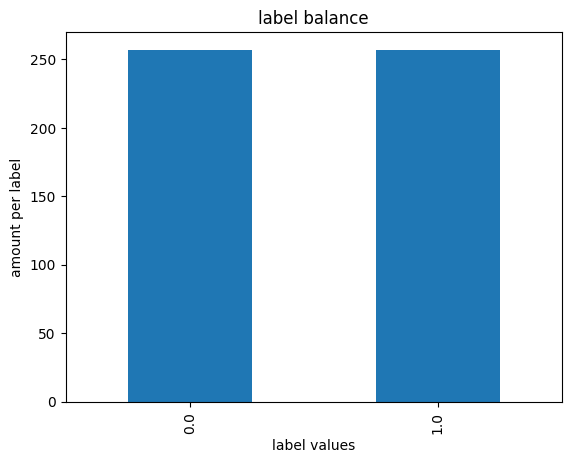

In [365]:
from imblearn.over_sampling import SMOTE
from imblearn.datasets import make_imbalance
smote = SMOTE(random_state = 14)
X_train, Y_train = smote.fit_resample(X_train1, Y_train1)
Y_train.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

# **Step 5: Modelling**

## **Logistic Regression**

In [367]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=20, penalty = 'l1', solver='liblinear')
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_validate)


Y_train_pred_lr = lr.predict(X_train)
train_score_lr = round(accuracy_score(Y_train_pred_lr, Y_train) * 100, 2)
print("Train Accuracy: " + str(train_score_lr) + " %")

Y_pred_lr.shape
score_lr = round(accuracy_score(Y_pred_lr,Y_validate)*100,2)
print("Validation Accuracy: "+str(score_lr)+" %")

Y_validate_pred_proba_lr = lr.predict_proba(X_validate)
logloss_lr = log_loss(Y_validate, Y_validate_pred_proba_lr)
print("Log Loss:", logloss_lr)

cm_lr = confusion_matrix(Y_validate, Y_pred_lr)
print("Confusion Matrix:")
print(cm_lr)

print(classification_report(Y_validate, Y_pred_lr, target_names=['Good Rating', 'Bad Rating']))


Train Accuracy: 72.76 %
Validation Accuracy: 71.93 %
Log Loss: 0.5990064345564964
Confusion Matrix:
[[40 23]
 [ 9 42]]
              precision    recall  f1-score   support

 Good Rating       0.82      0.63      0.71        63
  Bad Rating       0.65      0.82      0.72        51

    accuracy                           0.72       114
   macro avg       0.73      0.73      0.72       114
weighted avg       0.74      0.72      0.72       114



## **Random Forest**

Random Forest Grid Search

In [368]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [16, 32, 64],
}

rf = RandomForestClassifier(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train, Y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_
Y_train_pred_rf = best_rf.predict(X_train)
Y_validate_pred_rf = best_rf.predict(X_validate)

# Calculate and print accuracy
train_accuracy_rf = accuracy_score(Y_train, Y_train_pred_rf) * 100
test_accuracy_rf = accuracy_score(Y_validate, Y_validate_pred_rf) * 100
print("Train Accuracy:", train_accuracy_rf)
print("Test Accuracy:", test_accuracy_rf)


Best Parameters: {'max_depth': 7, 'n_estimators': 64}
Best Score: 0.8872263468494195
Train Accuracy: 95.13618677042801
Test Accuracy: 86.8421052631579


In [369]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(max_depth= 5, n_estimators = 64, random_state= 42)
rf.fit(X_train, Y_train)
Y_validate_pred_rf = rf.predict(X_validate)
Y_train_pred_rf = rf.predict(X_train)


train_accuracy_rf = round(accuracy_score(Y_train_pred_rf, Y_train) * 100, 2)
print("Train Accuracy: "+str(train_accuracy_rf)+" %")

score_rf = round(accuracy_score(Y_validate_pred_rf,Y_validate)*100,2)
print("Validation Accuracy: "+str(score_rf)+" %")

Y_validate_pred_proba_rf = rf.predict_proba(X_validate)
logloss_rf = log_loss(Y_validate, Y_validate_pred_proba_rf)
print("Log Loss:", logloss_rf)

cm = confusion_matrix(Y_validate, Y_validate_pred_rf)
print("Confusion Matrix:")
print(cm)


print(classification_report(Y_validate, Y_validate_pred_rf, target_names=['Good Rating', 'Bad Rating']))


Train Accuracy: 92.22 %
Validation Accuracy: 88.6 %
Log Loss: 0.319563075319812
Confusion Matrix:
[[63  0]
 [13 38]]
              precision    recall  f1-score   support

 Good Rating       0.83      1.00      0.91        63
  Bad Rating       1.00      0.75      0.85        51

    accuracy                           0.89       114
   macro avg       0.91      0.87      0.88       114
weighted avg       0.91      0.89      0.88       114



## **Decision Tree**

In [371]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42,max_depth=3, min_samples_leaf=15,criterion = 'gini')


# Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}


dt_classifier.fit(X_train, Y_train)

y_pred = dt_classifier.predict(X_validate)

y_train_pred = dt_classifier.predict(X_train)

train_accuracy = accuracy_score(Y_train, y_train_pred)
print("Train Accuracy:", (train_accuracy*100).round(2),'%')

accuracy = accuracy_score(Y_validate, y_pred)
print("Test Accuracy:", (accuracy*100).round(2),'%')

Y_validate_pred_proba_dt = dt_classifier.predict_proba(X_validate)
logloss_dt = log_loss(Y_validate, Y_validate_pred_proba_dt)
print("Log Loss:", logloss_dt)

cm_dt = confusion_matrix(Y_validate, y_pred)
print("Confusion Matrix:")
print(cm_dt)

print(classification_report(Y_validate, y_pred, target_names=['Good Rating', 'Bad Rating']))


Train Accuracy: 88.52 %
Test Accuracy: 84.21 %
Log Loss: 0.3331240912435359
Confusion Matrix:
[[63  0]
 [18 33]]
              precision    recall  f1-score   support

 Good Rating       0.78      1.00      0.88        63
  Bad Rating       1.00      0.65      0.79        51

    accuracy                           0.84       114
   macro avg       0.89      0.82      0.83       114
weighted avg       0.88      0.84      0.84       114



## **Ensemble Learning**



### **1.   XGBoost**



In [373]:
from xgboost import XGBClassifier
XGB = XGBClassifier(max_depth=10, subsample=1, n_estimators=100, min_child_weight=5, random_state=42)

XGB.fit(X_train, Y_train)

y_pred_xgb = XGB.predict(X_validate)

y_train_pred_xgb = XGB.predict(X_train)

train_accuracy = accuracy_score(Y_train, y_train_pred_xgb)
print("Train Accuracy:", (train_accuracy*100).round(2),'%')

accuracy = accuracy_score(Y_validate, y_pred_xgb)
print("Test Accuracy:", (accuracy*100).round(2),'%')


Y_validate_pred_proba_xgb = XGB.predict_proba(X_validate)
logloss_xgb = log_loss(Y_validate, Y_validate_pred_proba_xgb)
print("Log Loss:", logloss_xgb)

cm_xgb = confusion_matrix(Y_validate, y_pred_xgb )
print("Confusion Matrix:")
print(cm_xgb)

print(classification_report(Y_validate, y_pred_xgb , target_names=['Good Rating', 'Bad Rating']))

Train Accuracy: 95.91 %
Test Accuracy: 86.84 %
Log Loss: 0.34664447631002304
Confusion Matrix:
[[57  6]
 [ 9 42]]
              precision    recall  f1-score   support

 Good Rating       0.86      0.90      0.88        63
  Bad Rating       0.88      0.82      0.85        51

    accuracy                           0.87       114
   macro avg       0.87      0.86      0.87       114
weighted avg       0.87      0.87      0.87       114



### **2.   AdaBoost**

In [374]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
dtclf = DecisionTreeClassifier(max_depth=4, criterion='gini',
                               random_state=100)
clf = AdaBoostClassifier(estimator=dtclf,
                            n_estimators=50,
                            learning_rate=0.6,
                            algorithm='SAMME.R',
                            random_state=300)

clf.fit(X_train, Y_train)



y_pred_clf = clf.predict(X_validate)

y_train_pred_clf = clf.predict(X_train)

train_accuracy = accuracy_score(Y_train, y_train_pred_clf)
print("Train Accuracy:", (train_accuracy*100).round(2),'%')

accuracy = accuracy_score(Y_validate, y_pred_clf)
print("Validation Accuracy:", (accuracy*100).round(2),'%')


Y_validate_pred_proba_clf = clf.predict_proba(X_validate)
logloss_clf = log_loss(Y_validate, Y_validate_pred_proba_clf)
print("Log Loss:", logloss_clf)

cm_clf = confusion_matrix(Y_validate, y_pred_clf)
print("Confusion Matrix:")
print(cm_clf)

print(classification_report(Y_validate, y_pred_clf , target_names=['Good Rating', 'Bad Rating']))

Train Accuracy: 100.0 %
Validation Accuracy: 85.09 %
Log Loss: 0.39395479469968053
Confusion Matrix:
[[58  5]
 [12 39]]
              precision    recall  f1-score   support

 Good Rating       0.83      0.92      0.87        63
  Bad Rating       0.89      0.76      0.82        51

    accuracy                           0.85       114
   macro avg       0.86      0.84      0.85       114
weighted avg       0.85      0.85      0.85       114



## **Step 6: Pickling**

In [376]:
import pickle

### **1. Pickle Models**

In [377]:
pickle.dump(lr, open('logisticRegression.pkl', 'wb'))
pickle.dump(rf, open('randomForest.pkl', 'wb'))
pickle.dump(dt_classifier, open('decisionTree.pkl', 'wb'))
pickle.dump(XGB, open('XGBoost.pkl', 'wb'))
pickle.dump(clf, open('AdaBoost.pkl', 'wb'))

### **2. Pickle Encoding**

In [378]:
ordinal_encoders = {
    'OE_processor_gnrtn' : ordinal_encoder_processor_gnrtn,
    'OE_warranty' : ordinal_encoder_warranty,
    'OE_processor_name' : ordinal_encoder_processor_name,
}

label_encoders = {
    'LE_brand' : label_encoder_brand,
    'LE_processor_brand' : label_encoder_processor_brand,
    'LE_ram_type' : label_encoder_ram_type,
    'LE_os' : label_encoder_os,
    'LE_weight' : label_encoder_weight,
    'LE_msoffice' : label_encoder_msoffice,
    'LE_touchscreen' : label_encoder_touchscreen,
}

pickle.dump(ordinal_encoders, open('ordinalEncoding.pkl', 'wb'))
pickle.dump(label_encoders, open('labelEncoding.pkl', 'wb'))

### **3. Pickle Normalization**

In [379]:
normalization_fns = {
    'normalize_price': price_scaler,
    'normalize_num_rating' : num_rating_scaler,
    'normalize_num_reviews' : num_reviews_scaler
}

In [380]:
#pickling normalization
pickle.dump(normalization_fns, open('normalizationFns.pkl', 'wb'))

### **4. Pickle Constant Values**


In [381]:
preproc_values = {
    'column_means' : numeric_mean,
    'column_modes' : categorical_mode
}

In [382]:
#pickling const values
pickle.dump(preproc_values, open('preprocValues.pkl', 'wb'))

In [383]:
pickle.dump(distinct_values_dict, open('distinctValues.pkl', 'wb'))